In [3]:
%load_ext autoreload
%autoreload 2
from sklearn.datasets import load_digits
# from scipy.spatial.distance import pdist
# from sklearn.manifold.t_sne import _joint_probabilities
# from scipy import linalg
# from sklearn.metrics import pairwise_distances
# from scipy.spatial.distance import squareform
from sklearn.manifold import TSNE
from matplotlib import pyplot as plt

In [4]:
import numpy as np
import qutip as qt
from CD_control_optimization.batch_optimizer import BatchOptimizer
from CD_control_optimization.optimization_sweeps import OptimizationSweeps

from scipy import stats
import seaborn as sns


Need tf version 2.3.0 or later. Using tensorflow version: 2.3.0



In [6]:
# Setup Cooldown Unitary
N = 50  # cavity hilbert space
targ = np.array(qt.tensor(qt.identity(2), qt.identity(N)))
targ[0, 0] = 1
targ[1, 1] = 0
targ[1, N] = 1
targ[N, 1] = 1
targ[N, N] = 0
targ[N + 1, N + 1] = 1
target_unitary = qt.Qobj(targ, dims=[[2, N], [2, N]])

# Setup Basis States
initial_states = [
    qt.tensor(qt.basis(2, 0), qt.basis(N, 0)),
    (qt.tensor(qt.basis(2, 0), qt.coherent(N, 2)) + qt.tensor(qt.basis(2, 0), qt.coherent(N, -2))).unit()
]


target_states = initial_states[:]

N_blocks = 1
N_multistart = 20
epochs = 100
epoch_size = 20
use_displacements = True
no_CD_end = True
desired_epsilon = 1e-4
term_fid = 1 - desired_epsilon
dfid_stop = 1e-6
beta_scale = 3.0
alpha_scale = 0.5
name = "cooldown"
sweep_name = "sweep"
min_N_blocks = 2
max_N_blocks = 20
learning_rate = 0.01

opt = BatchOptimizer(
    initial_states=initial_states,
    target_states=target_states,
    N_blocks=N_blocks,
    term_fid=term_fid,
    N_multistart=N_multistart,
    use_displacements=use_displacements,
    no_CD_end=no_CD_end,
    dfid_stop=dfid_stop,
    name=name,
    epochs=epochs,
    epoch_size=epoch_size,
    beta_scale=beta_scale,
    alpha_scale=alpha_scale,
    iter=1,
    learning_rate=learning_rate,
)

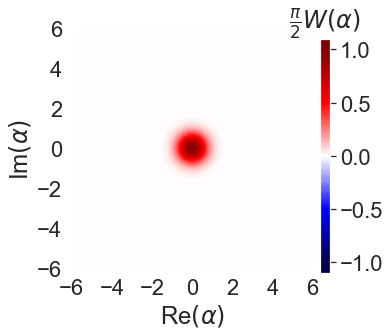

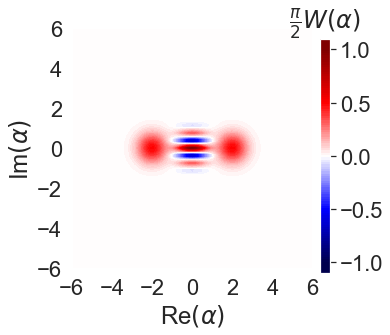

In [7]:
sns.set(font_scale=2)
opt.plot_initial_states(cbar=True)
sns.set(font_scale=1)